In [3]:
%load_ext rpy2.ipython

In [4]:
%%R

train <- read.csv('/content/fashion-mnist_train.csv')

In [ ]:
%%R
dim(train)
table(train[, 1])


   0    1    2    3    4    5    6    7    8    9 
6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 


In [5]:
%%R
#center and scaling the data for mean 0, std 1

train_sc <- scale(train[,-1])

In [ ]:
%%R
wss <- function(k) {
  kmeans(train_sc, k, nstart = 10)$tot.withinss
}

# Compute and plot wss for k = 2 to k = 15
k.values <- c(2:15)

# extract wss for 2-15 clusters
wss_values = c()
for(i in k.values){
  print(i)
  wss_values <- c(wss_values, wss(i))
}

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


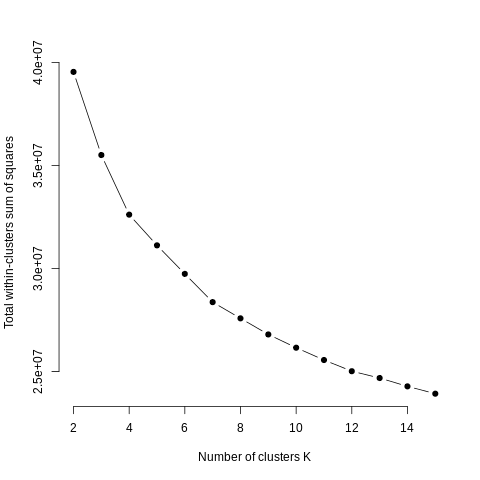

In [ ]:
%%R
plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [ ]:
%%R
wss_values

 [1] 39546774 35510277 32615385 31124213 29739500 28367588 27579574 26797605
 [9] 26153532 25555886 25013039 24681623 24276480 23920974


In [ ]:
%%R
c(16:18)

[1] 16 17 18


In [ ]:
%%R
# adding more clusters 

k.new <- c(16:18)

# extract wss for 16-18 clusters
for(i in k.new){
  print(i)
  wss_values <- c(wss_values, wss(i))
}

[1] 16
[1] 17
[1] 18


In [ ]:
%%R
wss_values

 [1] 39546774 35510277 32615385 31124213 29739500 28367588 27579574 26797605
 [9] 26153532 25555886 25013039 24681623 24276480 23920974 23604737 23355337
[17] 23056681


In [ ]:
%%R
k.times <- c(2:18)

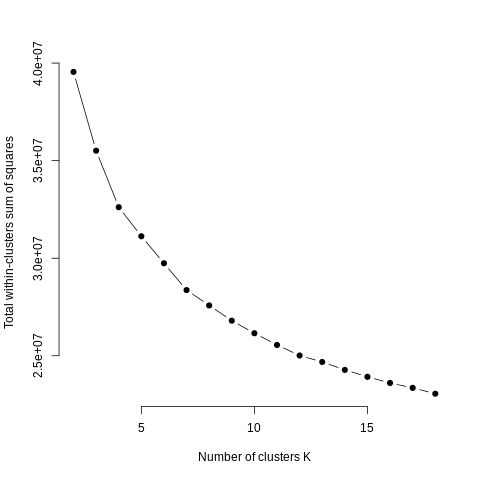

In [ ]:
%%R
plot(k.times, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [6]:
%%R
set.seed(4)
km <- kmeans(train_sc, centers = 10, nstart = 25)

In [ ]:
%%R
km$centers

In [ ]:
%%R
aggregate(train, by=list(cluster=km$cluster), mean)

In [ ]:
%%R 
str(km)

List of 9
 $ cluster     : int [1:60000] 9 6 10 4 4 10 4 7 10 1 ...
 $ centers     : num [1:10, 1:784] 0.00733 -0.00819 -0.0095 0.02753 -0.0095 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "1" "2" "3" "4" ...
  .. ..$ : chr [1:784] "pixel1" "pixel2" "pixel3" "pixel4" ...
 $ totss       : num 4.7e+07
 $ withinss    : num [1:10] 1864570 2776281 1881795 3077958 2348669 ...
 $ tot.withinss: num 26153539
 $ betweenss   : num 20885677
 $ size        : int [1:10] 2510 8054 6679 7414 9101 4703 7600 2337 2311 9291
 $ iter        : int 7
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


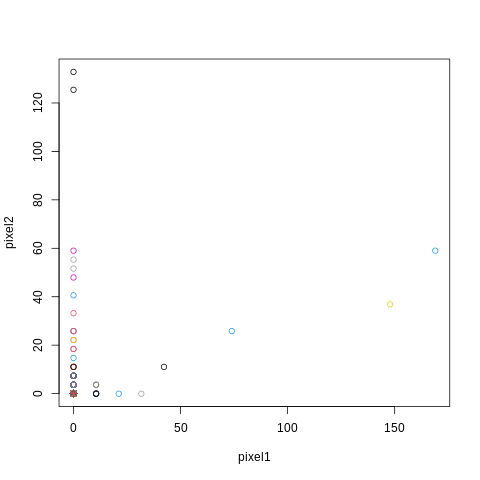

In [ ]:
%%R
plot(train_sc, col = km$cluster)
points(km$centers, col = 1:10, pch = 8)

In [7]:
%%R
#add cluster assigment to original data
df <- cbind(train, cluster = km$cluster)

In [8]:
%%R

write.csv(df, "/content/fashion-mnist_train_with_clusters.csv", row.names=FALSE)